<a href="https://colab.research.google.com/github/Rodrigo-Lopes-de-Andrade/Artigos_e_Projetos/blob/main/Detec%C3%A7%C3%A3o_de_Anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ao contrário do que a maioria dos cursos de ciência de dados faria você acreditar, nem todo conjunto de dados é um grupo perfeitamente curado de observações sem valores ausentes ou outliers (por exemplo, mtcars e conjuntos de dados de íris). Os dados do mundo real são confusos, o que significa que precisamos limpá-los e colocá-los em um formato aceitável antes mesmo de iniciarmos a análise. A limpeza de dados é uma parte nada glamorosa, mas necessária da maioria dos problemas reais de ciência de dados. Neste caderno, tentarei explicar o que são outliers e seus tipos, como detectar outliers e também medidas corretivas para outliers

### Por favor, vote positivamente no bloco de notas se você achar que é perspicaz!

### Espero que você ache o caderno útil, deixe-me saber o que você acha na seção de comentários abaixo e conecte-me no LinkedIn @ [Rodrigo Andrade] (https://www.linkedin.com/in/rodrigo-lopes-de-andrade-51753246/)

#### Vamos começar importando todas as bibliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

# O que são outliers?

#### Vou tentar explicar de uma maneira simplificada
### Um outlier é uma observação diferente das outras observações. É raro, distinto ou não se encaixa de alguma forma. Também é chamado de anomalias.

#### Outliers podem ter muitas causas, como:

#### - Erro de medição ou entrada.
#### - Corrupção de dados.
#### - Observação de valores discrepantes verdadeiros.

#### Não há uma maneira precisa de definir e identificar outliers em geral devido às especificidades de cada conjunto de dados. Em vez disso, você, ou um especialista no domínio, deve interpretar as observações brutas e decidir se um valor é um outlier ou não.

#### No entanto, podemos usar métodos estatísticos para identificar observações que parecem raras ou improváveis, dados os dados disponíveis. Isso não significa que os valores identificados sejam outliers e devam ser removidos. Uma boa dica é considerar representar graficamente os valores discrepantes identificados, talvez no contexto de valores não discrepantes para ver se há algum relacionamento ou padrão sistemático para os valores discrepantes. Se houver, talvez eles não sejam valores discrepantes e possam ser explicados, ou talvez os próprios valores discrepantes possam ser identificados de forma mais sistemática.

<img src="https://media.giphy.com/media/bWlBE4EgQrXb2/giphy.gif">

# Types of outliers:

### Outlier pode ser de dois tipos:
### 1) Univariada
### 2) Multivariada.

#### Outliers univariados podem ser encontrados quando olhamos para a distribuição de uma única variável. Outliers multivariados são outliers em um espaço n-dimensional. Para encontrá-los, você deve examinar as distribuições em várias dimensões.

#### Vamos entender isso com um exemplo. Digamos que estamos entendendo a relação entre altura e peso. Abaixo, temos a distribuição univariada e bivariada para Altura, Peso. Dê uma olhada no gráfico de caixa. Não temos nenhum outlier (acima e abaixo de 1,5 * IQR, método mais comum). Agora olhe para o gráfico de dispersão. Aqui, temos dois valores abaixo e um acima da média em um segmento específico de peso e altura.

## Qual é o impacto de outliers em um conjunto de dados?

#### Outliers podem alterar drasticamente os resultados da análise de dados e da modelagem estatística. Existem inúmeros impactos desfavoráveis ​​de outliers no conjunto de dados:

#### - Aumenta a variância do erro e reduz o poder dos testes estatísticos
#### - Se os outliers não forem distribuídos aleatoriamente, eles podem diminuir a normalidade
#### - Eles podem enviesar ou influenciar estimativas que podem ser de interesse substantivo
#### - Eles também podem afetar a suposição básica de regressão, ANOVA e outras suposições do modelo estatístico.



### Para dar exemplos de detecção de valores discrepantes e medidas corretivas, vou pegar alguns conjuntos de dados para trabalhar

# Outlier Detection Techniques:

## A) Univariate Outliers:

In [ ]:
df_1 = pd.read_csv("https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/outlier_heart.csv")
df_1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### I will perform basic EDA to analyse the Data Frame

In [ ]:
df_1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There are no null values in the data frame

In [ ]:
df_1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Let's consider serum cholestoral in mg/dl column i.e. "chol" for our analysis. I'll plot a simple box plot which is the best visualization for detecting outliers

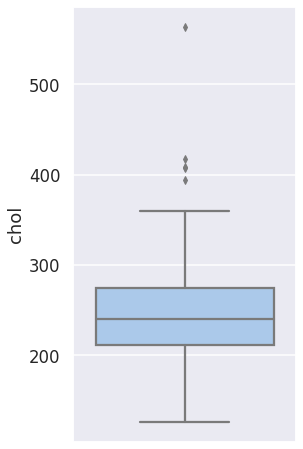

In [ ]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df_1.chol)

#### From the above box plot, we can surely observe that there are outliers in it!

# 1) Interquartile Range Method

#### O conceito de Intervalo Interquartil (IQR) é usado para construir os gráficos de boxplot. IQR é um conceito em estatística usado para medir a dispersão estatística e a variabilidade dos dados dividindo o conjunto de dados em quartis.

#### Em palavras simples, qualquer conjunto de dados ou qualquer conjunto de observações é dividido em quatro intervalos definidos com base nos valores dos dados e como eles se comparam ao conjunto de dados inteiro. Um quartil é o que divide os dados em três pontos e quatro intervalos.

#### É a diferença entre o terceiro quartil e o primeiro quartil (IQR = Q3 -Q1). Outliers neste caso são definidos como as observações que estão abaixo (Q1 - 1,5x IQR) ou bigode inferior do boxplot ou acima (Q3 + 1,5x IQR) ou bigode superior do boxplot. Pode ser representado visualmente pelo box plot.

#### Vamos definir uma função para descobrir o IQR, inferior e superior do bigode.

In [ ]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calcular o IQR
    iqr = q75 - q25
    # calcule o corte de outlier
    cut_off = iqr * 1.5
    # calcule o valor do limite inferior e superior
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calcular o número de registros abaixo e acima do valor limite inferior e acima, respectivamente
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

### Vou usar o [Heart disease UCI DataSet] (https://www.kaggle.com/ronitf/heart-disease-uci) para explicar o método IQR.

In [ ]:
out_iqr(df_1,'chol')
#Input the dataset and the required column

The IQR is 63.5
The lower bound value is 115.75
The upper bound value is 369.75
Total number of outliers are 5


In [ ]:
### Imprimir os Outliers 
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df_1['chol'])

Outliers: [417, 564, 394, 407, 409]


### De acordo com o método IQR, existem 5 outliers.

### Representação visual:

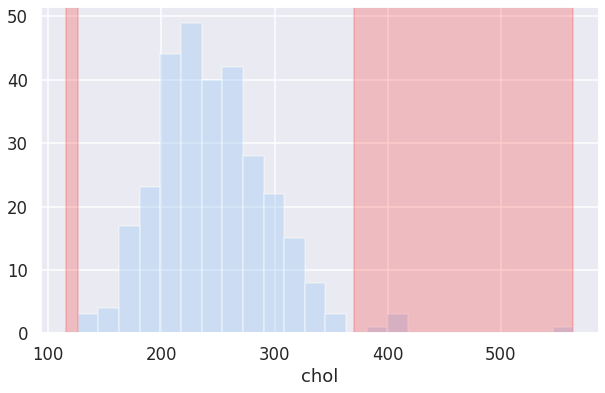

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df_1.chol, kde=False)
plt.axvspan(xmin = lower,xmax= df_1.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_1.chol.max(),alpha=0.2, color='red')

#### Aqui, a zona vermelha representa a zona atípica! Os registros presentes nessa zona são considerados outliers

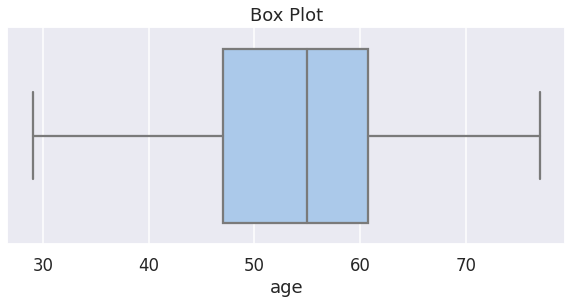

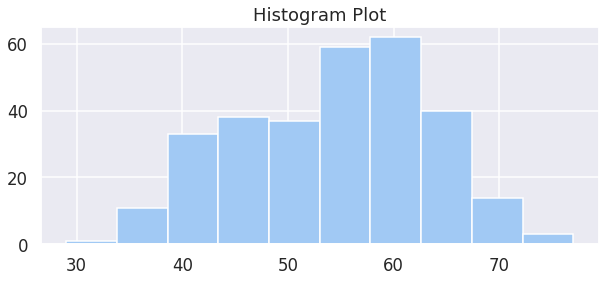

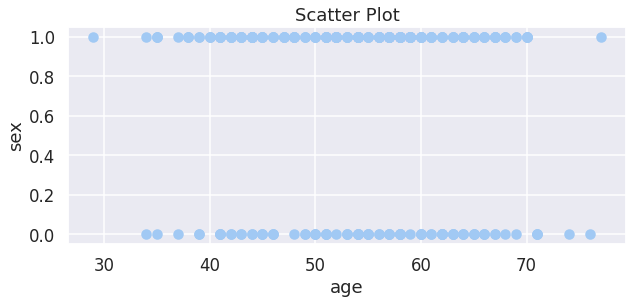

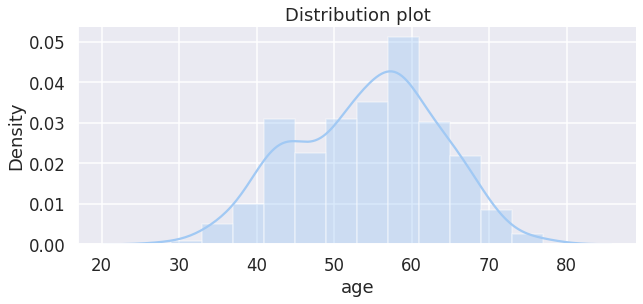

<Figure size 720x288 with 0 Axes>

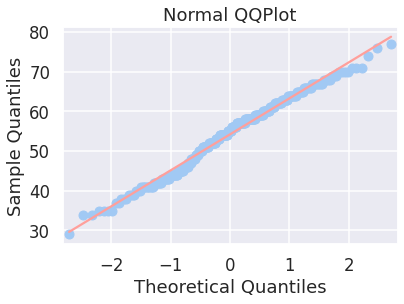

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(df_1['age'])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(df_1['age'])

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('age')
    ax.set_ylabel('sex')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(df_1['age'],df_1['sex'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(df_1['age'])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(df_1['age'])


### Medida Corretiva:
#### Remova os registros que estão acima do valor do limite superior e os registros abaixo do valor do limite inferior!

In [ ]:
#Data Frame without outliers
df_new = df_1[(df_1['chol'] < upper) | (df_1['chol'] > lower)]

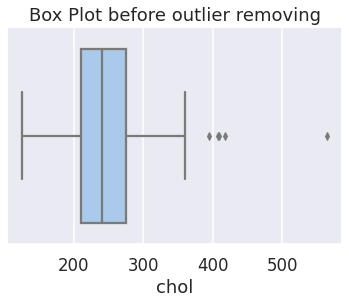

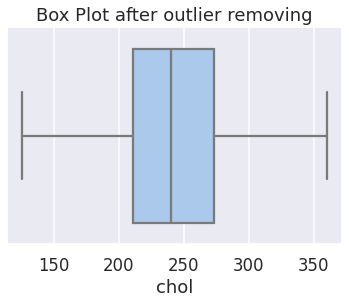

In [ ]:
sns.boxplot(df_1['chol'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df_1, 'chol')
sns.boxplot(df_1['chol'])
plt.title("Box Plot after outlier removing")
plt.show()

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/outlier_heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
def check_missing(dataframe):
    if dataframe.isnull().sum().sum() > 0:
        print(dataframe.isnull().sum(), '\n')
        print('Existem {} valores ausentes'.format(dataframe.isnull().sum().sum()))
    else:
        print('Não há valores ausentes')

check_missing(df)

Não há valores ausentes


In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
    
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")
        
missing_vs_target(df,'target',missing_values_table(df,na_name=True))

          n_miss  ratio
trestbps       9   2.98
oldpeak        5   1.66
chol           5   1.66
thalach        1   0.33
                  TARGET_MEAN  Count
trestbps_NA_FLAG                    
0                    0.549488    293
1                    0.333333      9


              TARGET_MEAN  Count
chol_NA_FLAG                    
0                0.542088    297
1                0.600000      5


                 TARGET_MEAN  Count
thalach_NA_FLAG                    
0                    0.54485    301
1                    0.00000      1


                 TARGET_MEAN  Count
oldpeak_NA_FLAG                    
0                   0.548822    297
1                   0.200000      5




In [ ]:
#Looking  data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
trestbps,9,0.029801
oldpeak,5,0.016556
chol,5,0.016556
thalach,1,0.003311
target,0,0.000000
thal,0,0.000000
ca,0,0.000000
slope,0,0.000000
exang,0,0.000000
restecg,0,0.000000


In [ ]:
for c in ['thal', 'cp', 'sex']:
    df[c].fillna('none', inplace=True)

In [ ]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  14
Number of Categorical features:  0


In [ ]:
print(df.shape)

n = df.select_dtypes(include=object)
for column in n.columns:
    print(column, ':  ', data[column].unique())

(303, 14)


In [ ]:
## Let's see the distribuition of the categories: 
for category in list(categorical_feats):
    print('#'*35)    
    print('Distribuition of feature:', category)
    print(data[category].value_counts(normalize=True))
    print('#'*35)

In [ ]:
# fillna
for c in ['MiscFeature', 'Alley', 'Fence']:
    data[c].fillna('None', inplace=True)
    
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

data.loc[data.GarageYrBlt.isnull(),'GarageYrBlt'] = data.loc[all_data.GarageYrBlt.isnull(),'YearBuilt']

data['GarageType'].fillna('None', inplace=True)
data['GarageFinish'].fillna(0, inplace=True)

for c in ['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    data[c].fillna(0, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder


for i, t in data.loc[:, data.columns != 'SalePrice'].dtypes.iteritems():
    if t == object:
        data[i].fillna(data[i].mode()[0], inplace=True)
        data[i] = LabelEncoder().fit_transform(data[i].astype(str))
    else:
        data[i].fillna(data[i].median(), inplace=True)

In [ ]:
def check_duplications(dataframe):
    if dataframe.duplicated().sum() > 0:
        if dataframe.duplicated().sum() == 1:
            print('Há {} valores duplicados nos dados'.format(dataframe.duplicated().sum()))
        else:
            print('Existem {} valores duplicados nos dados'.format(dataframe.duplicated().sum()))
    else:
        print('Não há valores duplicados nos dados ')
        
check_duplications(df)

Há 1 valores duplicados nos dados


In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df.drop_duplicates(keep='first',inplace=True)
check_duplications(df)

Não há valores duplicados nos dados 


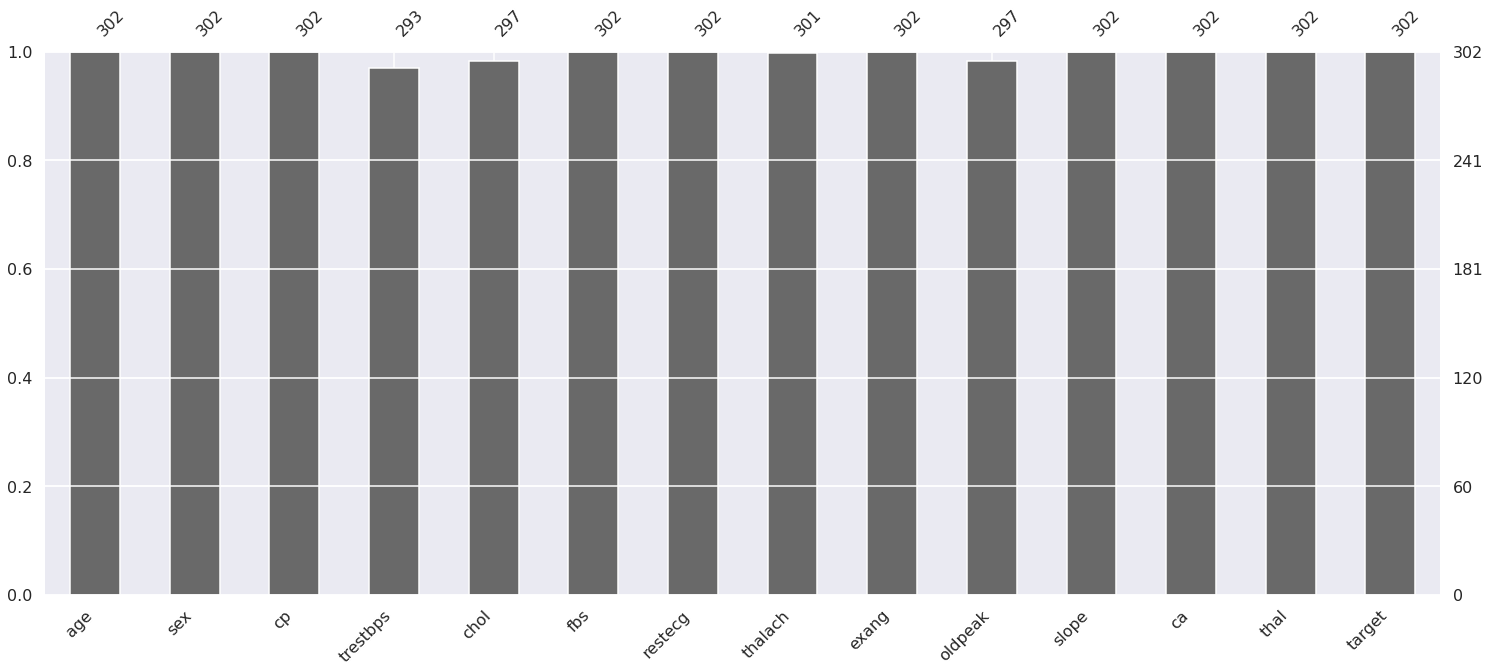

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

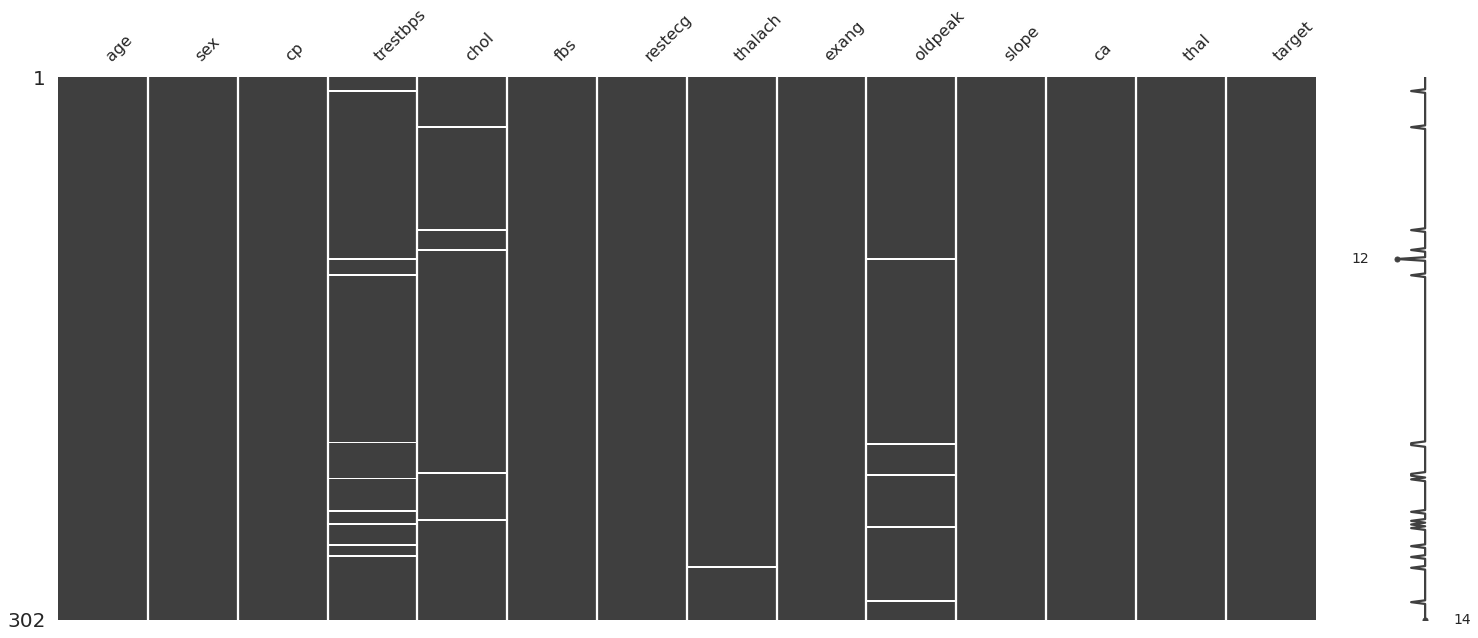

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

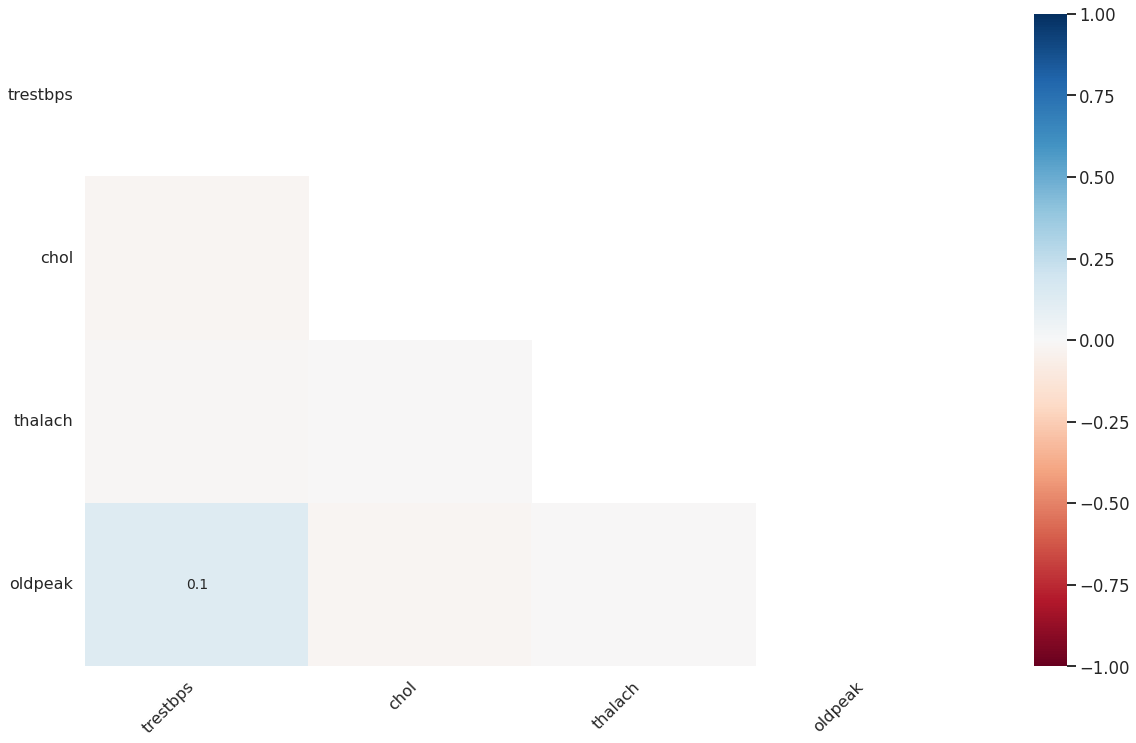

In [ ]:
import missingno as msno
msno.heatmap(df)
plt.show()

In [ ]:
df.loc[df['chol'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140.0,NaN,1,0,157.0,0,0.8,2,1,2,1
85,67,0,2,115.0,NaN,0,0,160.0,0,1.6,1,0,3,1
96,62,0,0,140.0,NaN,0,0,157.0,0,1.2,1,0,2,1
221,55,1,0,140.0,NaN,0,1,111.0,1,5.6,0,0,3,0
247,66,1,1,160.0,NaN,0,1,120.0,1,0.0,1,3,1,0


In [ ]:
missing_values_table(df,na_name=False)

          n_miss  ratio
trestbps       9   2.98
oldpeak        5   1.66
chol           5   1.66
thalach        1   0.33


In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe,
                               columns = categorical_cols,
                               drop_first = drop_first)
    return dataframe

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
print('Binary Variables: {}'.format(binary_cols))

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
print('Multiclass Variables: {}'.format(ohe_cols))

Binary Variables: []
Multiclass Variables: ['cp', 'restecg', 'slope', 'ca', 'thal']


In [ ]:
for col in binary_cols:
    df = label_encoder(df, col)

In [ ]:
##Variáveis ​​inúteis
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]
print('Number of useless variables: {}'.format(len(useless_cols)))

Number of useless variables: 0


In [ ]:
df.drop(useless_cols, axis=1, inplace=True)
cat_cols, num_cols, cat_but_car = grab_col_names(df)

NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler() #StandardScaler - RobustScaler
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.576923,1,3,0.75,-0.111111,1,0,-0.060606,0,0.9375,0,0,1,1
1,-1.423077,1,2,0.00,0.158730,0,1,1.060606,0,1.6875,0,0,2,1
2,-1.115385,0,1,0.00,-0.571429,0,0,0.606061,0,0.3750,2,0,2,1
3,0.038462,1,1,-0.50,-0.063492,0,1,0.787879,0,0.0000,2,0,2,1
4,0.115385,0,0,-0.50,1.809524,0,1,0.333333,1,-0.1250,2,0,2,1
